In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from numpy import linalg as LA

In [2]:
yelp_df = pd.read_csv("yelp.csv") # 1326100 rows × 21 columns

# Problem 1

In [3]:
yelp_df

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,elite,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,0,0,0,0,None,3.70,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,0,0,0,0,None,2.00,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,0,0,0,0,None,4.67,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,4,0,0,0,None,3.45,...,0,0,0,0,0,0,0,0,1,0
5,Ob-2oGBQ7rwwYwUvhmnf7g,B,9,2012-05-01,0,0,0,0,None,4.78,...,0,0,0,0,0,0,0,0,0,0
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,0,0,0,0,None,5.00,...,0,0,0,0,0,0,0,0,0,0
7,Ykj0DVsz0c6rX9ghjd0hDg,Colleen,1,2010-10-10,0,0,0,0,None,1.00,...,0,0,0,0,0,0,0,0,0,0
8,kmyEPfKnHQJdTceCdoyMQg,A,7,2012-10-16,0,0,0,0,None,4.29,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,0,0,0,0,None,5.00,...,0,0,0,0,0,0,0,0,0,0


In [4]:
yelp_df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [5]:
''' yelp_df.columns
Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')
'''

li = yelp_df.columns.drop(['user_id', 'name',  'yelping_since', 'elite'])
dic = dict()
for i in li:
    dic[i] = np.var(yelp_df[i].values)

In [6]:
dic

{'review_count': 6256.501920157796,
 'useful': 498256.04744871485,
 'funny': 247467.46919877833,
 'cool': 448260.6079190277,
 'fans': 204.0922646748887,
 'average_stars': 1.2560141306697388,
 'compliment_hot': 5857.105709961896,
 'compliment_more': 221.74695280597726,
 'compliment_profile': 313.28095513738856,
 'compliment_cute': 197.06867893365938,
 'compliment_list': 145.2961648204173,
 'compliment_note': 3640.50989031006,
 'compliment_plain': 8797.003092766136,
 'compliment_cool': 8019.669471444235,
 'compliment_funny': 8019.669471444235,
 'compliment_writer': 1168.268248953872,
 'compliment_photos': 9908.782862960023}

In [7]:
selected_features = ['review_count', 'useful', 'funny','cool', 'average_stars',\
                     'compliment_hot','compliment_more', 'compliment_note','compliment_plain', \
                     'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']

In [8]:
len(selected_features)

13

# Problem 2

In [9]:
np.set_printoptions(suppress = True)

In [10]:
def getRandomSeq(bound, num):
    '''
    To generate a random int sequence with no duplicates.
    upperbound: bound, number: num
    
    '''
    result = np.zeros(num)
    result[0] = np.random.randint(bound)
    num_set = set()
    num_set.add(result[0])
    for i in range(1, num):
        result[i] = np.random.randint(bound)
        if result[i] in num_set:
            while result[i] in num_set:
                result[i] = np.random.randint(bound)
        else:
            num_set.add(result[i])
    return result

In [11]:
dataset_df = yelp_df[selected_features]

In [12]:
data = dataset_df.values #(1326100, 13)

In [13]:
def minibatch_kmeans(data, k, minibatch_size, max_iter, centroids, isRandom = False):
    # randomly pick k centroids
    if isRandom:
        centroids = data[np.array(getRandomSeq(data.shape[0], k)).astype(int)]
    
    max_list = []
    min_list = []
    mean_list = []
    
    for t in range(1, max_iter + 1):
        # randomly select a batch from dataset
        batch_index = np.array(getRandomSeq(data.shape[0], minibatch_size)).astype(int)

        dic = dict()
        
        total_dis = 0
        max_value = -pow(10, 100)
        min_value = pow(10, 100)
        
        for x in batch_index:
            min_dis = pow(10, 100)

            # cache the center nearest to x
            for c in range(len(centroids)):
                cur_dis = np.linalg.norm(data[x, :] - centroids[c])
                if cur_dis < min_dis:
                    min_dis = cur_dis
                    dic[x] = c

            # compute the total distance
            dis = np.linalg.norm(data[x, :] - centroids[dic[x]])
            total_dis += dis
            max_value = max(max_value, dis)
            max_value = min(max_value, 25000)
            min_value = min(min_value, dis)
        
        max_list.append(max_value)
        min_list.append(min_value)
        mean_list.append(total_dis / minibatch_size)
        # update the centers
        eta = 1 / t
        for x in batch_index:
            centroids[dic[x]] = (1 - eta) * centroids[dic[x]] + eta * data[x, :]
            
    return centroids, dic, max_list, min_list, mean_list

In [24]:
max_iter = 1000

In [25]:
centroids, dic, max_list, min_list, mean_list = minibatch_kmeans(data, 5, 10000, max_iter, [], True)

Text(0.5,1,'Plot of max, min, mean of each iteration')

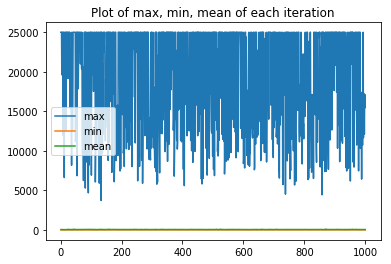

In [26]:
# plot
plt.plot(range(1, max_iter + 1), max_list)
plt.plot(range(1, max_iter + 1), min_list)
plt.plot(range(1, max_iter + 1), mean_list)
plt.legend(['max', 'min', 'mean'])
plt.title('Plot of max, min, mean of each iteration')

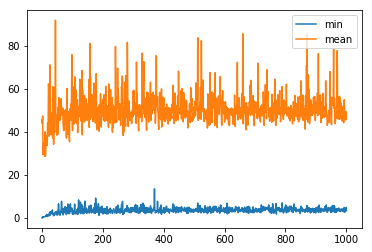

In [27]:
plt.plot(range(1, max_iter + 1), min_list)
plt.plot(range(1, max_iter + 1), mean_list)
plt.legend(['min', 'mean'])

# Problem 3

In [28]:
def nearest_cluster_center(vector, centroids):
    """Distance and index of the closest cluster center"""
 
    min_index = 0
    min_dis = pow(10, 100)
 
    for i, cc in enumerate(centroids):
        d = np.linalg.norm(cc - vector)
        if min_dis > d:
            min_dis = d
            min_index = i
 
    return min_index, min_dis

In [29]:
# initialize k centroids
def kpp(data, k):
    
    # initialize
    centroids = []
    for i in range(k):
        centroids.append(data[np.random.randint(data.shape[0])])
    
    d = [0 for i in range(data.shape[0])]
    
    for i in range(1, k):
        total = 0
        for j, p in enumerate(data):
            d[j] = nearest_cluster_center(p, centroids[ : i])[1]
            total += d[j]
 
        total *= random.random()
 
        for j, di in enumerate(d):
            total -= di
            if total > 0:
                continue
            centroids[i] = data[j]
            break
            
    dic = dict()
    for i in range(len(data)):
        dic[i] = nearest_cluster_center(data[i, :], centroids)[0]
        
    return dic, centroids

In [30]:
kpp_dic, kpp_centroids = kpp(data, 5)

In [31]:
centroids_kpp, dic_kpp, max_list_kpp, min_list_kpp, mean_list_kpp = minibatch_kmeans(data, 5, 10000, max_iter, kpp_centroids, False)

Text(0.5,1,'Plot of max, min, mean of each iteration')

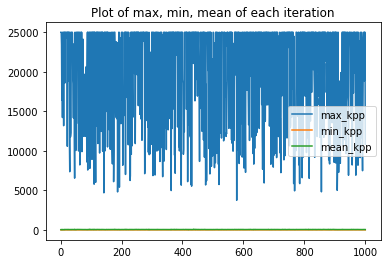

In [32]:
# plot
plt.plot(range(1, max_iter + 1), max_list_kpp)
plt.plot(range(1, max_iter + 1), min_list_kpp)
plt.plot(range(1, max_iter + 1), mean_list_kpp)
plt.legend(['max_kpp', 'min_kpp', 'mean_kpp'])
plt.title('Plot of max, min, mean of each iteration')

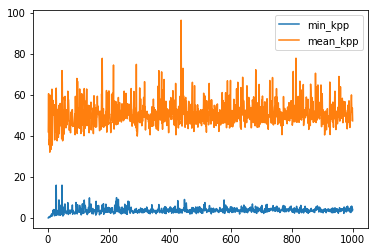

In [33]:
plt.plot(range(1, max_iter + 1), min_list_kpp)
plt.plot(range(1, max_iter + 1), mean_list_kpp)
plt.legend(['min_kpp', 'mean_kpp'])

# Problem 4

In [22]:
# Reducing dimensions
def zero_Mean(X_train):      
    meanVal = np.mean(X_train, axis = 0)     # Calculate mean values based on columns(features)
    new_train = X_train - meanVal
    return new_train, meanVal

In [23]:
def d_reduction(X_train,n):
    new_train,meanVal = zero_Mean(X_train)
    covMat = np.cov(new_train,rowvar = 0)    # Calculate covariance matrix,return ndarray；If rowvar is not 0，one column represents one X，if it is 0，one row represents one X
    
    eigVals,eigVects = LA.eig(np.mat(covMat))# Get eigvals and eigvects,eigvals are placed by columns
    eigVal_Indice = np.argsort(eigVals)            # Sort eigvals in increasing order
    n_eigVal_Indice = eigVal_Indice[-1:-(n+1):-1]   # The largest n eigvals
    n_eigVect = eigVects[:,n_eigVal_Indice]        # The corresponding eigvects
    lowD_DataMat = new_train * n_eigVect               # Low-dimensional data
    recon_Mat = (lowD_DataMat * n_eigVect.T) + meanVal  # Reconstruct data
    return lowD_DataMat,recon_Mat

In [24]:
lowD_DataMat, recon_Mat = d_reduction(data, 2)

In [25]:
lowD_Data = np.array(lowD_DataMat)

In [26]:
lowD_kpp_dic, lowD_kpp_centroids = kpp(lowD_Data, 5)

In [27]:
lowD_centroids_kpp, lowD_dic_kpp, lowD_max_list_kpp, lowD_min_list_kpp, lowD_mean_list_kpp = minibatch_kmeans(lowD_Data, 3, 10000, 1000, lowD_kpp_centroids, False)

In [ ]:
for i in range(len(lowD_Data)):
    plt.scatter(lowD_Data[i, 0], lowD_Data[i,1], s = 7, c = 'b')
plt.scatter(np.array(lowD_centroids_kpp)[:,0], np.array(lowD_centroids_kpp)[:,1], marker = '*', c = 'g', s = 150)

# Problem 5

In [ ]:
for k in range(5,310,50):
    centroids, dic, max_list, min_list, mean_list = minibatch_kmeans(data, k, 10000, 100, [], True)

In [ ]:
k = range(5,310,50)
plt.figure()
plt.plot(k,mean_list)
plt.xlabel('Number of centroids')
plt.ylabel('Mean distances')

plt.figure()
plt.plot(k,min_list)
plt.xlabel('Number of centroids')
plt.ylabel('Minimum distances')

plt.figure()
plt.plot(k,max_list)
plt.xlabel('Number of centroids')
plt.ylabel('Maximum distances')

In [ ]:
for k in range(5,310,50):
    kpp_dic, kpp_centroids = kpp(data, k)
    centroids_kpp, dic_kpp, max_list_kpp, min_list_kpp, mean_list_kpp = minibatch_kmeans(data, k, 10000, 100, kpp_centroids, False)

In [ ]:
k = range(5,310,50)
plt.figure()
plt.plot(k, mean_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Mean distances')

plt.figure()
plt.plot(k, min_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Minimum distances')

plt.figure()
plt.plot(k, max_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Maximum distances')

In [ ]:
for k in range(5,310,50):

    lowD_DataMat, recon_Mat = d_reduction(data, 2)
    lowD_Data = np.array(lowD_DataMat)
    lowD_kpp_dic, lowD_kpp_centroids = kpp(lowD_Data, 5)
    lowD_centroids_kpp, lowD_dic_kpp, lowD_max_list_kpp, lowD_min_list_kpp, lowD_mean_list_kpp = minibatch_kmeans(lowD_Data, 3, 10000, 1000, lowD_kpp_centroids, False)

In [ ]:
k = range(5,310,50)
plt.figure()
plt.plot(k, lowD_mean_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Mean distances')

plt.figure()
plt.plot(k, lowD_min_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Minimum distances')

plt.figure()
plt.plot(k, lowD_max_list_kpp)
plt.xlabel('Number of centroids')
plt.ylabel('Maximum distances')